# RGB色空間での画像の取り扱い

In [1]:
import os
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_path(path):
    with open(path, encoding='utf-8') as fp:
        line = fp.readlines()
    return line

path = os.path.join(read_path('filepath')[0], 'lena.jpg')
img_bgr = cv2.imread(path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)

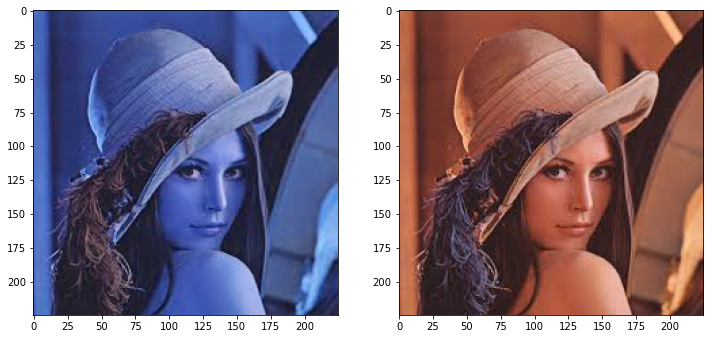

In [3]:
# figsizeのデフォルト値は(6.4, 4.8)
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 9))
ax = ax.flatten()
for i, val in enumerate([img_bgr, img_rgb]):
    ax[i].imshow(val)
plt.show()

# HSVおよびHLS色空間での画像の取り扱い
### HSV
色相・彩度・明度を表す<br>
OpenCVでは`cv2.cvtColor(img, cv2.COLOR_BGR2HSV)`でHSV色空間に変換できる

### HLS
色相・輝度・彩度を表す<br>
`cv2.COLOR_BGR2HLS`で変換

### LAB
輝度・緑-赤・青-黄を表す<br>
`cv2.COLOR_BGR2LAB`で変換

### YUV
輝度・青-輝度・赤-輝度を表す<br>
`cv2.COLOR_BGR2YUV`で変換

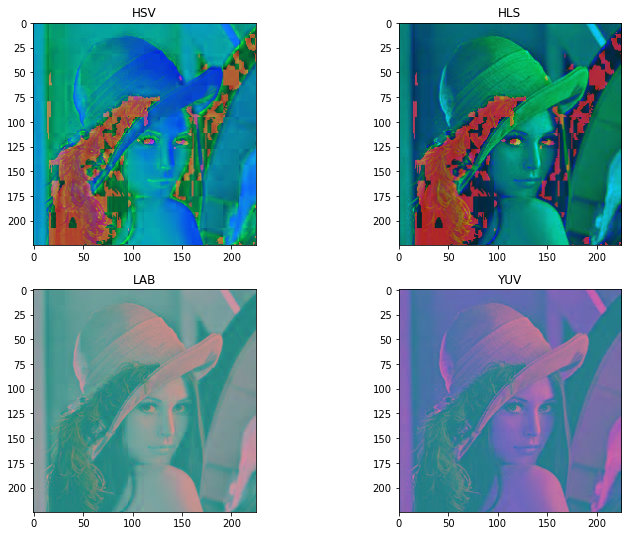

In [4]:
img_hsv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HSV)
img_hls = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2HLS)
img_lab = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2LAB)
img_yuv = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2YUV)
label_titles = ['HSV', 'HLS', 'LAB', 'YUV']

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 9))
ax = ax.flatten()
for i, val in enumerate([img_hsv, img_hls, img_lab, img_yuv]):
    ax[i].set_title(label_titles[i])
    ax[i].imshow(val)
plt.show()

# 画像中のコーナー検出
### Harrisコーナー検出
`cv2.cornerHarris`<br>
エッジがあらゆる方向に高い輝度変化を持つ領域であると想定のもと、このような領域を素早く見つけるアルゴリズム

### Shi-Tomasiコーナー検出
`cv2.goodFeaturesToTrack`<br>
最も強度の高い$N$個のコーナーを見つけ、Harrisコーナー検出よりも多くの場合、優れた結果を得ることができるアルゴリズム

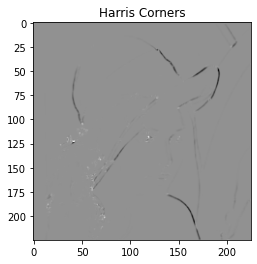

In [9]:
# Harrisコーナー検出はグレースケール画像上でのみ機能するので、BGR画像をグレースケールに変換する必要がある
img_gray = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2GRAY)
harris_corners = cv2.cornerHarris(img_gray, 2, 3, 0.04)
plt.title('Harris Corners')
plt.imshow(harris_corners, cmap='gray')
plt.show()